In [222]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [223]:
#Reading the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Employee_Attrition_Data_Set.csv')

In [224]:
#Looking at the central tendency of the dataset
dataset.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


In [225]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


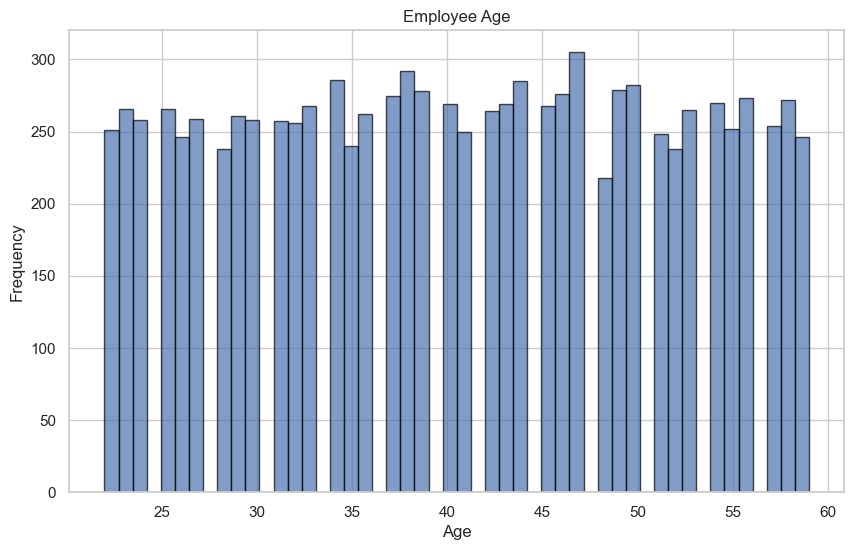

In [226]:
#Histogram to look at the distribution for Age
plt.figure(figsize=(10, 6))
plt.hist(dataset['Age'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Employee Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

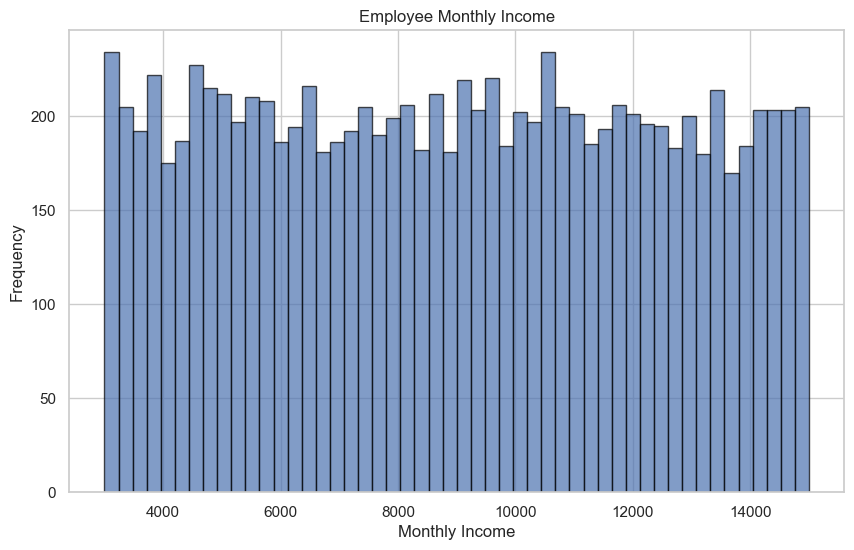

In [227]:
#Histogram to look at the distribution for Monthly Income
plt.figure(figsize=(10, 6))
plt.hist(dataset['Monthly Income'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Employee Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

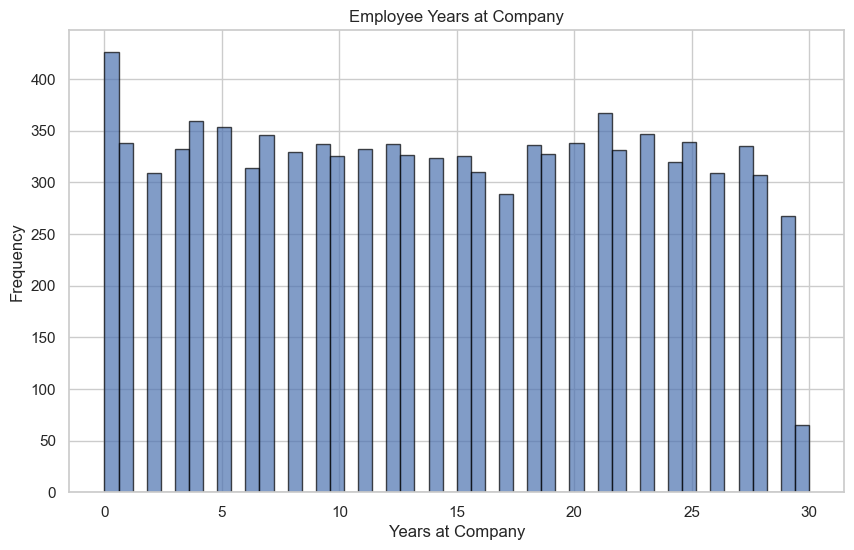

In [228]:
#Histogram to look at the distribution for Years at Company
plt.figure(figsize=(10, 6))
plt.hist(dataset['Years at Company'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Employee Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

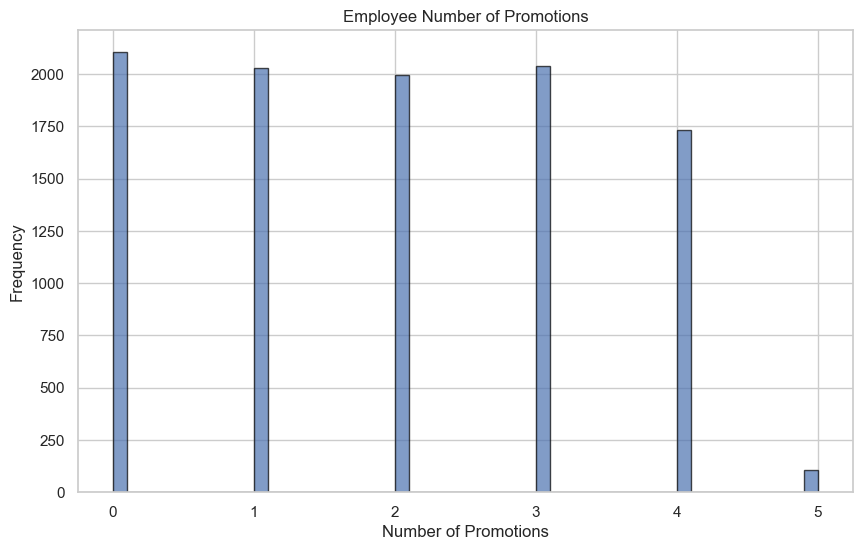

In [229]:
#Histogram to look at the distribution for Promotions
plt.figure(figsize=(10, 6))
plt.hist(dataset['Number of Promotions'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Employee Number of Promotions')
plt.xlabel('Number of Promotions')
plt.ylabel('Frequency')
plt.show()

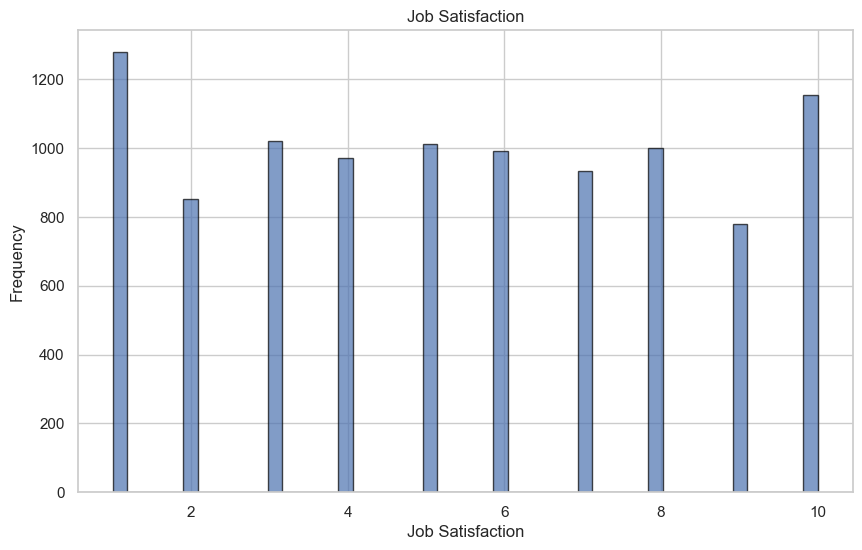

In [230]:
#Histogram to look at the distribution for Job Satisfaction
plt.figure(figsize=(10, 6))
plt.hist(dataset['Job Satisfaction'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()

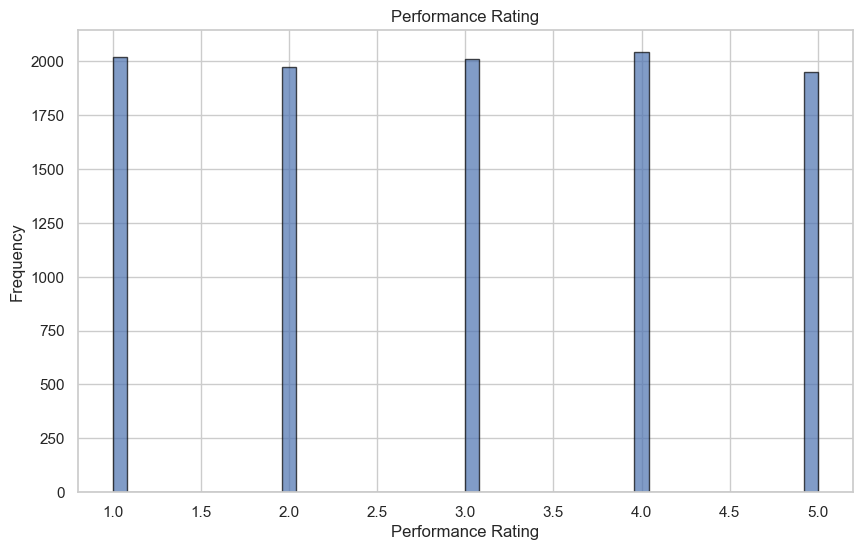

In [231]:
#Histogram to look at the distribution for Performance Rating
plt.figure(figsize=(10, 6))
plt.hist(dataset['Performance Rating'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()

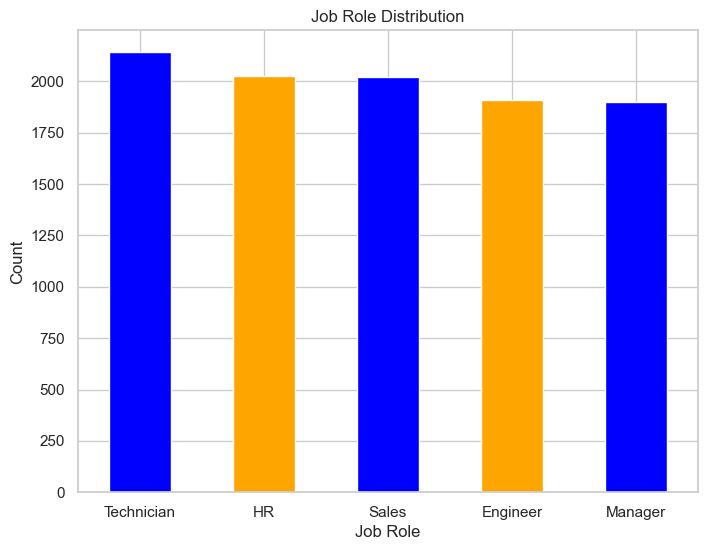

In [232]:
#Barplot to look at the distribution for the job role
job_role_count = dataset['Job Role'].value_counts()

plt.figure(figsize=(8, 6))
job_role_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

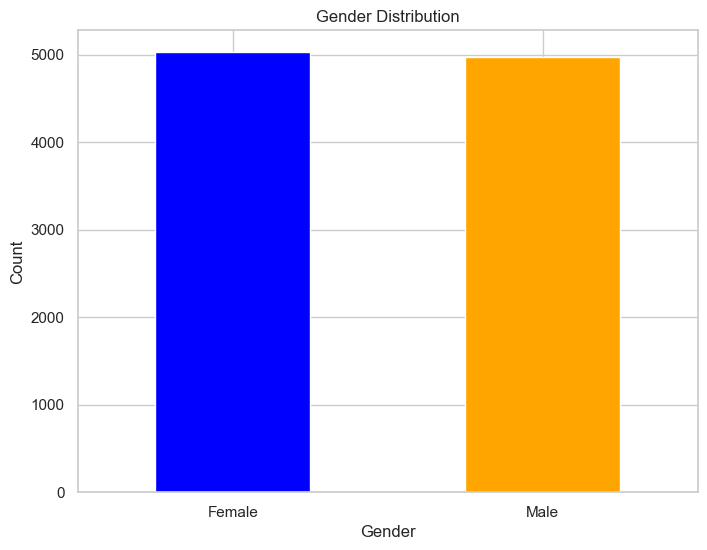

In [233]:
##Barplot to look at the distribution for the Gender Count
gender_count = dataset['Gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

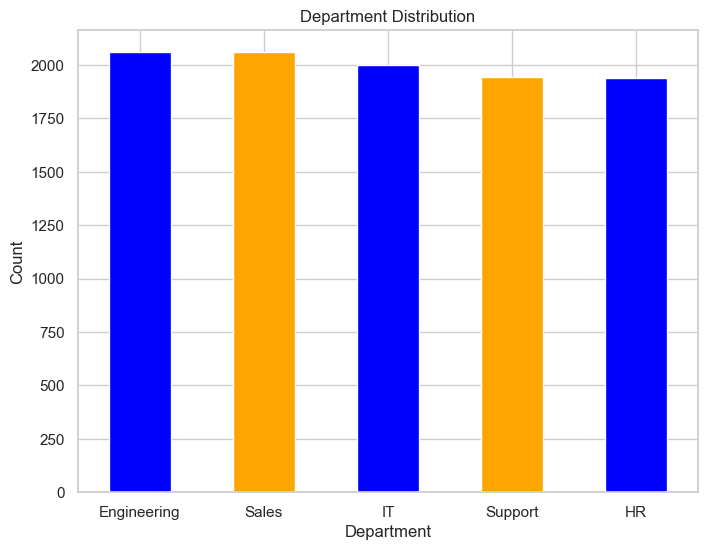

In [234]:
#Barplot to look at the distribution for the Department Distrubtion
department_count = dataset['Department'].value_counts()

plt.figure(figsize=(8, 6))
department_count.plot(kind='bar', color=['blue', 'orange'])
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

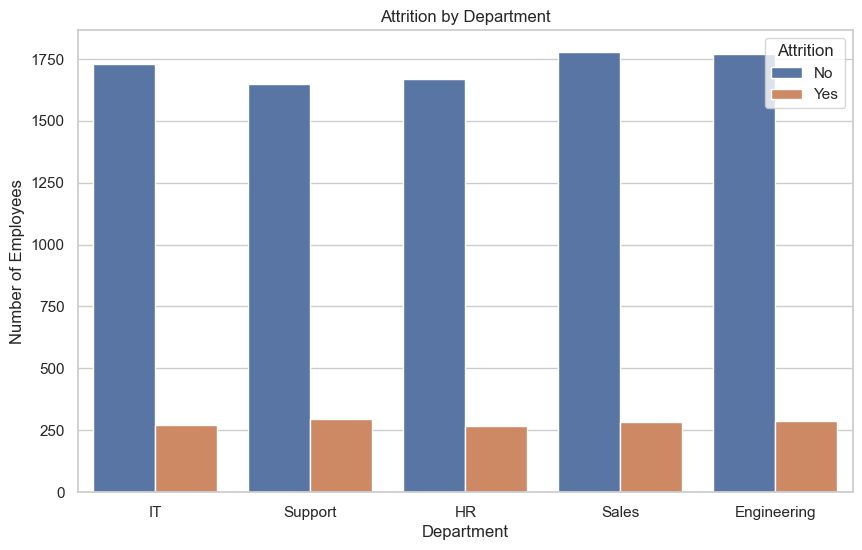

In [235]:
#Countplot to look at the distribution of Attrition by Department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=dataset)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

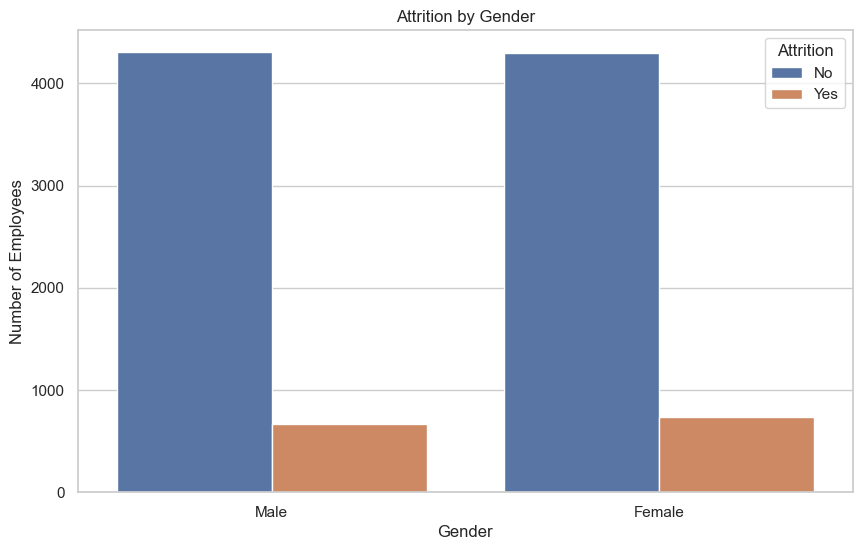

In [236]:
#Countplot to look at the distribution of Attrition by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=dataset)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

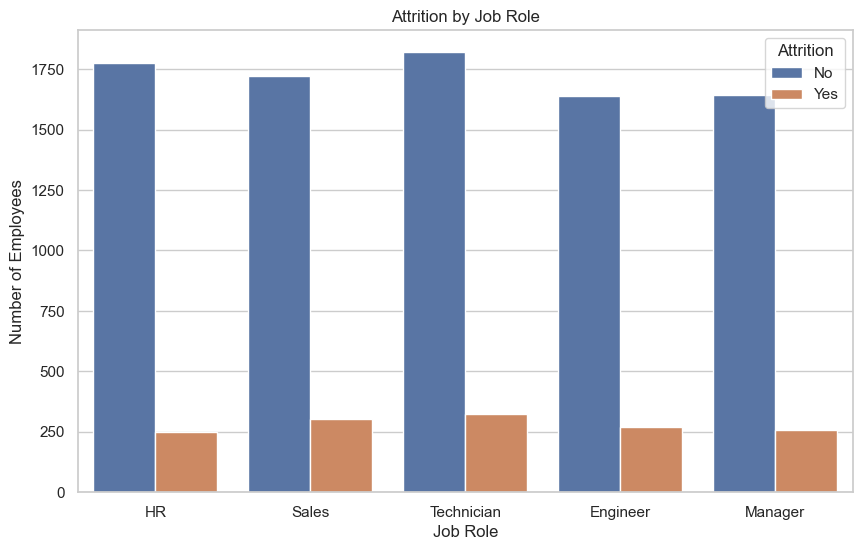

In [237]:
#Countplot to look at the distribution of Attrition by Job Role 
plt.figure(figsize=(10, 6))
sns.countplot(x='Job Role', hue='Attrition', data=dataset)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

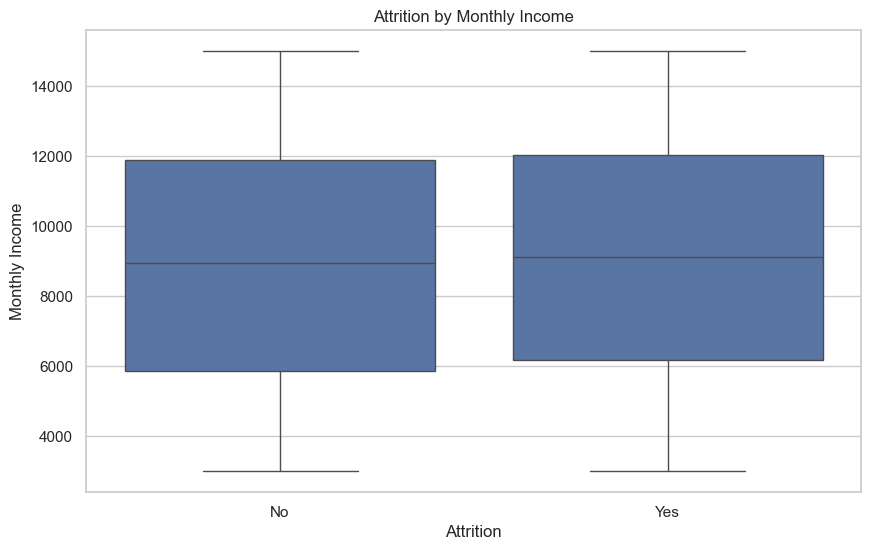

In [238]:
#Countplot to look at the distribution of Attrition by Monthly Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Monthly Income', data=dataset)
plt.title('Attrition by Monthly Income')
plt.show()

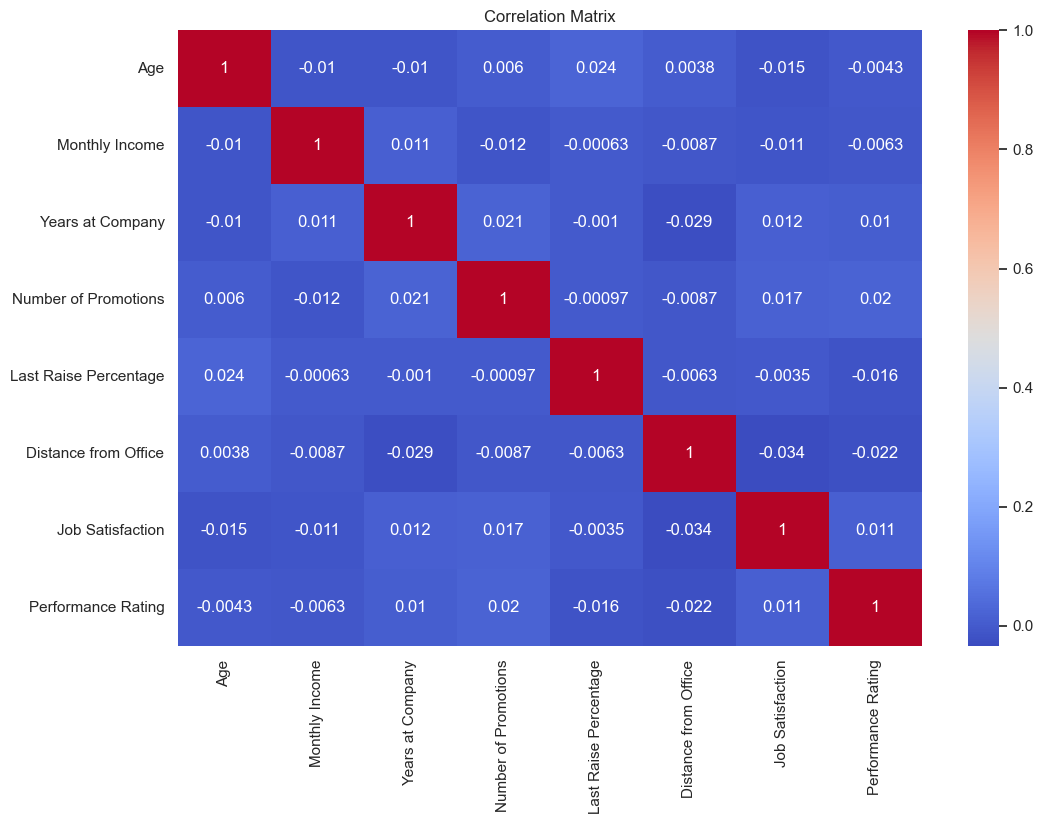

In [239]:
#Correlation Matrix for all numerical variables to determine the strength of the relationship.
numerical_columns = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction', 'Performance Rating']

numerical_data = dataset[numerical_columns]

# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [240]:
# Splitting the data into features and target
X = dataset.drop(columns=['Attrition'])
y = dataset['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identifying categorical and numerical columns
categorical_columns = ['Gender', 'Job Role', 'Department']
numerical_columns = [
    'Age', 'Monthly Income', 'Years at Company',
    'Number of Promotions', 'Last Raise Percentage',
    'Distance from Office', 'Job Satisfaction', 'Performance Rating'
]

# Creating a preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
)

# Applying the transformations and fitting the model
X_preprocessed = preprocessor.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Output the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8000, 17)
X_test shape: (2000, 17)
y_train shape: (8000,)
y_test shape: (2000,)


In [241]:
# Initialize the models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [242]:
# Train the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [243]:
# Make predictions
log_reg_preds = log_reg.predict(X_test)
decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)

In [244]:
# Evaluate the models
log_reg_report = classification_report(y_test, log_reg_preds, output_dict=True)
decision_tree_report = classification_report(y_test, decision_tree_preds, output_dict=True)
random_forest_report = classification_report(y_test, random_forest_preds, output_dict=True)

log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
decision_tree_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
random_forest_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

# Consolidate the results
model_report = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_report['accuracy'], decision_tree_report['accuracy'], random_forest_report['accuracy']],
    'Precision': [log_reg_report['1']['precision'], decision_tree_report['1']['precision'], random_forest_report['1']['precision']],
    'Recall': [log_reg_report['1']['recall'], decision_tree_report['1']['recall'], random_forest_report['1']['recall']],
    'F1-Score': [log_reg_report['1']['f1-score'], decision_tree_report['1']['f1-score'], random_forest_report['1']['f1-score']],
    'AUC-ROC': [log_reg_auc, decision_tree_auc, random_forest_auc]
}

# Convert to DataFrame for better visualization
model_report_df = pd.DataFrame(model_results)
model_report_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,0.861,0.000000,0.000000,0.000000,0.658865
1,Decision Tree,0.746,0.179558,0.235507,0.203762,0.531617
2,Random Forest,0.858,0.388889,0.050725,0.089744,0.626384


In [ ]:
#Logistic Regression: While it has high accuracy (0.861), it fails to identify instances of attrition (Precision, Recall, F1-Score all at 0), suggesting it may not be suitable for this imbalanced dataset.

#Decision Tree: This model shows a balance between precision (0.179) and recall (0.236), but overall performance metrics are relatively low, indicating room for improvement.

#Random Forest: This model offers a slightly better precision (0.389) compared to the Decision Tree but still struggles with recall (0.051), indicating difficulty in correctly identifying attrition cases.

#Business Impact:
#i The dataset consisted of several employee attributes, including age, gender, job role, department, monthly income, years at the company, number of promotions, last raise percentage, distance from the office, job satisfaction, and performance rating. After the initial glance at the dataset in relation to the business question, the attrition rate stood out as the target variable that was classified as 'Yes' in the attrition column; with key metrics being Job satisfaction, monthly income, years at the company, and performance ratings that emerged as critical factors, with noticeable patterns linked to employee attrition.

As for the intitial hypothesis, I hypothesized that employees with lower job satisfaction and income levels were more likely to leave the company along with employees with shorter tenure at the company possibly due to a lack of integration or career growth. As a matter of fact, the hypothesis regarding job satisfaction and income proved true. Employees with lower job satisfaction and income were indeed more likely to leave the company. As for the tenure, the shorter tenure did correlate with higher attrition, the relationship was more nuanced. Some long-tenured employees also left, possibly due to stagnation or lack of advancement opportunities.



#ii Firstly, I started by ensuring the data was clean and ready for further analysis. This involved checking for any missing values, ensuring consistent data types, and addressing any outliers which didn't exist in this case. Next, the categorical varaible like gender and job role were encoded numerically to be used in the model. As for model selection, I selected several machine learning models to predict employee attrition, including Logistic Regression, Decision Trees, and Random Forests. I chose these models because of their ability to handle classification tasks and interpretability. Each of this model was trained on the processed data, with the training set split from the overall dataset. The models learned to predict whether an employee would leave based on the features provided. Next, the models were evaluated using key metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. These metrics provided a comprehensive view of how well the model distinguishes between employees who will stay and those who will leave.



#iii After evaluating multiple models, including Logistic Regression, Decision Trees, and Random Forests, I selected the Random Forest classifier as the final model for predicting employee attrition. The Random Forest model showed the best balance between precision, recall, and F1-score among the tested models. The Random Forest model emerged as the best solution for predicting employee attrition, balancing high performance with interpretability and robustness. This model will enable the company to identify employees at risk of leaving and take proactive measures to enhance job satisfaction and retention.




#iv The Random Forest model for predicting employee attrition can be a powerful tool for the business, helping to proactively manage workforce stability and improve overall employee satisfaction. Here's how the model can be integrated into various business processes. For instance, The model can be used to score current employees based on their likelihood of leaving the company. This allows HR and management to identify at-risk employees and intervene early. Once at-risk employees are identified, the company can implement targeted retention strategies, such as personalized career development plans, increased engagement initiatives, or adjustments to compensation packages.









